# 1. Import VGG16

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
# Let's vizualize the model
# load the model
model = VGG16()
# summarize the model
model.summary()

553467096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


# 2. Load bird image

In [ ]:
from keras.utils import load_img, img_to_array

In [ ]:
# DOWNLOAD THE FOLLOWING IMAGE
# https://images.pexels.com/photos/1059823/pexels-photo-1059823.jpeg?auto=compress&cs=tinysrgb&w=800
img = load_img("bird.jpg", target_size=(224, 224))

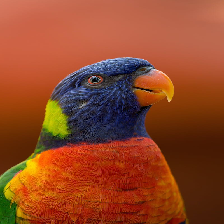

In [ ]:
img

In [ ]:
img = img_to_array(img)

In [ ]:
img.shape # target size

(224, 224, 3)

# 3. Expand dims to the following

In [ ]:
import numpy as np
img = np.expand_dims(img, axis=0)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
# Prepare the image (e.g. scale pixel values for the vgg)
# The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.

img = preprocess_input(img)

In [ ]:
img

array([[[[  -6.939003 ,    5.2210007,   90.32     ],
         [  -6.939003 ,    5.2210007,   90.32     ],
         [  -7.939003 ,    4.2210007,   89.32     ],
         ...,
         [ -22.939003 ,   -6.7789993,   61.32     ],
         [ -23.939003 ,   -5.7789993,   62.32     ],
         [ -21.939003 ,   -3.7789993,   64.32     ]],

        [[  -7.939003 ,    4.2210007,   89.32     ],
         [  -7.939003 ,    4.2210007,   89.32     ],
         [  -6.939003 ,    5.2210007,   90.32     ],
         ...,
         [ -21.939003 ,   -4.7789993,   65.32     ],
         [ -23.939003 ,   -4.7789993,   64.32     ],
         [ -22.939003 ,   -3.7789993,   65.32     ]],

        [[  -7.939003 ,    4.2210007,   89.32     ],
         [  -7.939003 ,    4.2210007,   89.32     ],
         [  -8.939003 ,    3.2210007,   88.32     ],
         ...,
         [ -22.939003 ,   -4.7789993,   67.32     ],
         [ -23.939003 ,   -3.7789993,   68.32     ],
         [ -22.939003 ,   -2.7789993,   69.32     ]],

# 4. Create model with the first layers

In [ ]:
# Build model just with the first layer
from keras.models import Model
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i+1].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# 5. Predict to birds image

In [ ]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

1/1 [==============================] - 1s 903ms/step


In [ ]:
feature_maps[0].shape

(1, 112, 112, 64)

In [ ]:
feature_maps = feature_maps[0]

In [ ]:
import matplotlib.pyplot as plt
# plot all 64 maps in an 8x8 squares
square = 8
ix = 0
fig, ax = plt.subplots(8,8, figsize=(25,25))
axs = ax.flat
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		axs[_].set_xticks([])
		axs[_].set_yticks([])
		# plot filter channel in grayscale
		axs[ix].imshow(feature_maps[0, :, :, ix], cmap='gray')
		ix += 1
# show the figure
plt.show()

Output hidden; open in https://colab.research.google.com to view.